# <center>Unesco World Heritage Site List 1978-2024</center>

<center><img src="download.png"/></center>

***

## <center> Initial steps </center>

<p>I downloaded the neccesary libraries and software in order to later display my data in graph form. I next downloaded and printed the dataset.</p>

In [44]:
import matplotlib 
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
heritage_df = pd.read_csv('unesco-world-heritage/heritage-sites.csv', sep=',')

In [46]:
print(heritage_df)  

      Unnamed: 0  Rank                                         Site Name  \
0              0     1                                 Galapagos Islands   
1              1     2                                             Quito   
2              2     3                                  Aachen Cathedral   
3              3     4                                L'Anse aux Meadows   
4              4     8                             Ichkeul National Park   
...          ...   ...                                               ...   
1218        1218  1720                                              Gedi   
1219        1219  1721                                      Umm Al-Jimāl   
1220        1220  1722                                  The Flow Country   
1221        1221  1723  The Pleistocene Occupation Sites of South Africa   
1222        1222  1749                                     Tell Umm Amer   

      Nomination Year         Country  Rating  
0                1978         Ecuador  

## <center>Further research and inisght</center>

<p>I limited the dataset to ten rows and filtered out the unnamed sites. I sorted the data into the three categories I was most interested in viewing which were the Rating, Rank and Nomination Year and created a graph using hist term. Through using the column and describe function it returned that the averag rating was 3.2.   </p>

In [49]:
heritage_df.head(10)
heritage_df.drop(heritage_df.columns[heritage_df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)


In [50]:
heritage_df.head(10)

,Rank,Site Name,Nomination Year,Country,Rating
0,1,Galapagos Islands,1978,Ecuador,4.80
1,2,Quito,1978,Ecuador,3.40
2,3,Aachen Cathedral,1978,Germany,3.71
3,4,L'Anse aux Meadows,1978,Canada,3.39
4,8,Ichkeul National Park,1980,Tunisia,2.30
5,9,Simien National Park,1978,Ethiopia,3.75
6,10,Lower Valley of the Awash,1980,Ethiopia,3.14
7,12,Tiya,1980,Ethiopia,2.28
8,13,Melka Kunture and Balchit,2024,Ethiopia,1.61
9,15,Aksum,1980,Ethiopia,3.42


In [51]:
print(heritage_df[["Site Name","Nomination Year","Rating"]])


                                             Site Name  Nomination Year  \
0                                    Galapagos Islands             1978   
1                                                Quito             1978   
2                                     Aachen Cathedral             1978   
3                                   L'Anse aux Meadows             1978   
4                                Ichkeul National Park             1980   
...                                                ...              ...   
1218                                              Gedi             2024   
1219                                      Umm Al-Jimāl             2024   
1220                                  The Flow Country             2024   
1221  The Pleistocene Occupation Sites of South Africa             2024   
1222                                     Tell Umm Amer             2024   

      Rating  
0       4.80  
1       3.40  
2       3.71  
3       3.39  
4       2.30  
...      

In [52]:
heritage_df.columns
heritage_df.describe()

,Rank,Nomination Year,Rating
count,1223.000000,1223.000000,1223.000000
mean,869.318070,1999.896157,3.207228
std,494.637551,13.114310,0.724647
min,1.000000,1978.000000,0.000000
25%,439.500000,1988.000000,2.790000
50%,861.000000,1999.000000,3.240000
75%,1305.500000,2011.000000,3.670000
max,1749.000000,2024.000000,4.840000


array([[<Axes: title={'center': 'Rank'}>,
        <Axes: title={'center': 'Nomination Year'}>],
       [<Axes: title={'center': 'Rating'}>, <Axes: >]], dtype=object)

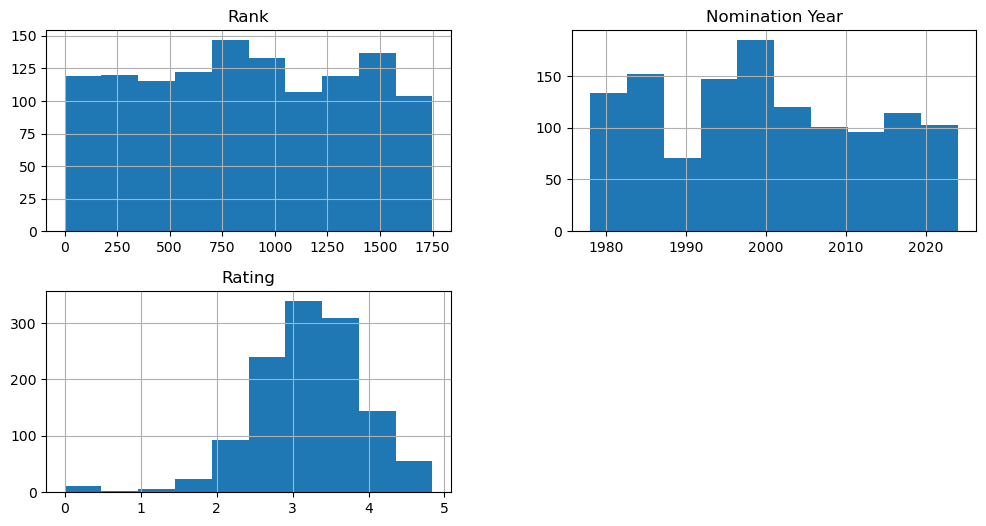

In [53]:
heritage_df.hist(figsize=(12, 6))


## <center> Cleaning the Data and narrowing my focus </center>

<p>In this section I searched the data types pertaining the heritage list categories. This was useful as later on in this project I had to change a float to an integer. I checked to see if any data was missing (which it wasn't). I focused on finding the most popular heritage sites with a rating over three during 2024. This returned a total of six sites.</p>

In [63]:
print(heritage_df.dtypes) 

Rank                 int64
Site Name           object
Nomination Year      int64
Country             object
Rating             float64
dtype: object


In [64]:
print(heritage_df[["Nomination Year", "Rating"]].isna().sum())


Nomination Year    0
Rating             0
dtype: int64


In [65]:
print (heritage_df[(heritage_df["Nomination Year"] == 2024) & (heritage_df["Rating"] > 3.0)])


      Rank                            Site Name  Nomination Year  \
1143  1611    Lençóis Maranhenses National Park             2024   
1162  1638                  Badain Jaran Desert             2024   
1196  1688  Cultural Landscape of Kenozero Lake             2024   
1211  1708                            Via Appia             2024   
1214  1713           The Royal Court of Tiébélé             2024   
1215  1714                 Beijing Central Axis             2024   

           Country  Rating  
1143        Brazil    3.80  
1162         China    3.05  
1196        Russia    3.50  
1211         Italy    3.30  
1214  Burkina Faso    3.50  
1215         China    3.03  


In [67]:
subset = heritage_df[(heritage_df["Nomination Year"] == 2024) & (heritage_df["Rating"] > 3.0)]

## <center>Figures and Graphs displaying heritage site popularity during 2024</center>

<p>I used a bar chart to plot the six most popular sites within 2024. I added a colour coded key which listed the Site Names, the X and Y axis depict the Rating and Nomination Year (2024). It clearly names Lençóis Maranhenses National Park as the site with the highest rating and Beijing Central Axis as the lowest rated. </p>

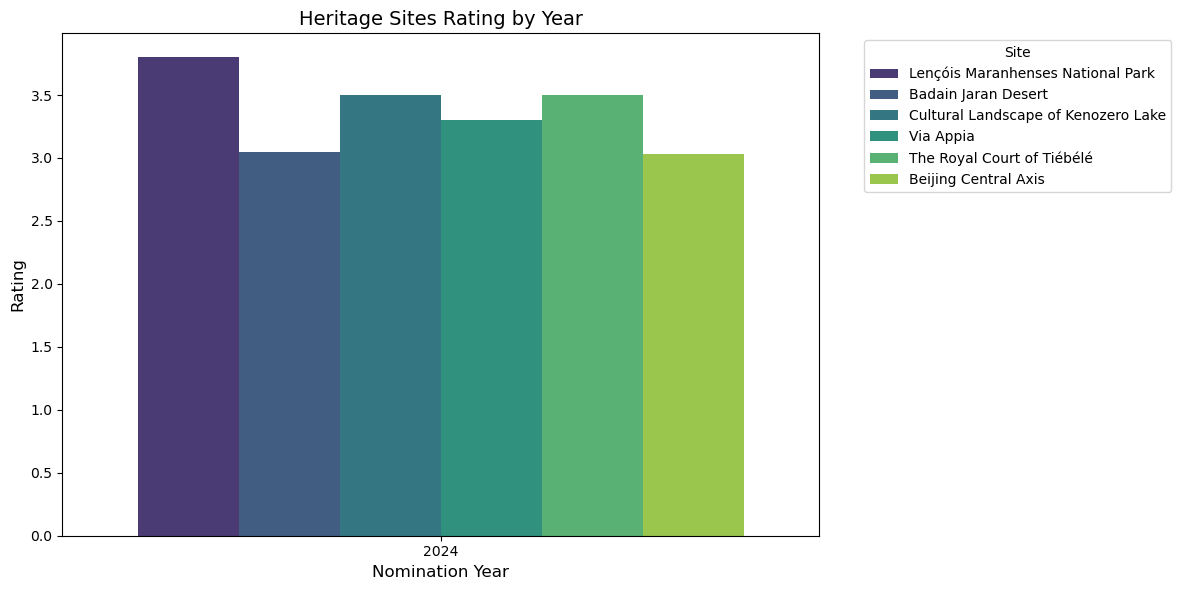

In [74]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Nomination Year", y="Rating", hue="Site Name", data=subset, dodge=True, palette="viridis")

# Enhanced the graph by adding title, each site labelled in the key discerned by colour, x and y axis clearly labelled, font size and figure size enlarged for clearer visuals. This graph lists the only 6 sites included within the dataset that were ranked 3 or over during 2024.
plt.title("Heritage Sites Rating by Year", fontsize=14)
plt.xlabel("Nomination Year", fontsize=12)
plt.ylabel("Rating", fontsize=12)
plt.legend(title="Site", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<p></p>

<p>Used a different format (pie chart) to display the same results found in the bar chart above. The only difference is that, I rounded the ratings for the sites so that they became integers instead of floats which created a clearer result.  </p>

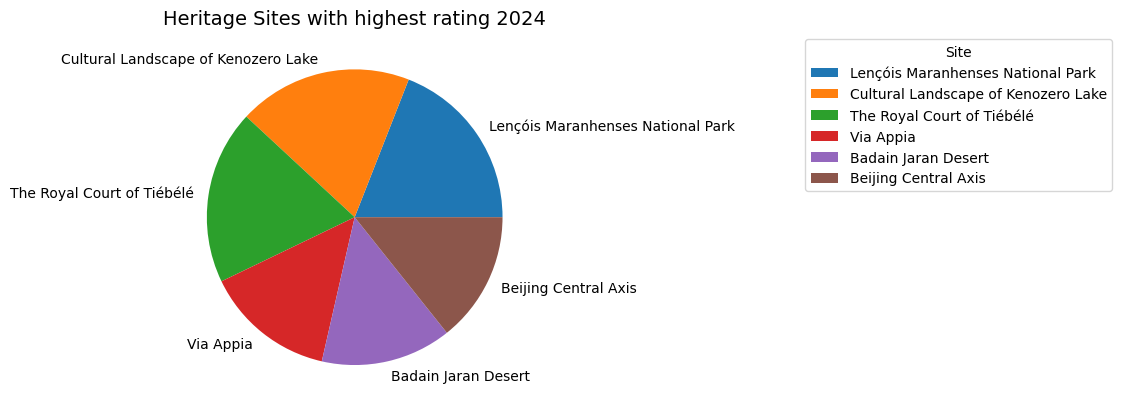

In [77]:

import numpy as np
y = np.array([ 4, 4, 4, 3, 3, 3 ])
mylabels = ["Lençóis Maranhenses National Park", "Cultural Landscape of Kenozero Lake", "The Royal Court of Tiébélé", "Via Appia","Badain Jaran Desert", "Beijing Central Axis"]

plt.title("Heritage Sites with highest rating 2024", fontsize=14)
plt.pie(y, labels = mylabels)
plt.legend(title="Site", bbox_to_anchor=(1.7, 1), loc='upper left')
plt.show() 

In [79]:
floats = [3.80, 3.05, 3.50, 3.30, 3.50, 3.03]
integers = [int(round(x)) for x in floats]
print(integers) 


[4, 3, 4, 3, 4, 3]


## <center>Research into sight ratings over 3* throughout the complete dataset timeline</center>

<p>Learned how to isolate certain sites purely based on their rank id. Decided to take a look at the general popularity of the UNESCO heritage sites from 1978-2024 and targeted those with a rating higher than three. It returned ten rows and I used the data contained in the results to created a bar chart that compared the rank and rating of the top four sites.Auschwitz Birkenau had the highest ratings and rank whereas Djoudj had the lowest rating and Fasil Ghebbi had the lowest rank.</p>

In [81]:
heritage_df = pd.read_csv('unesco-world-heritage/heritage-sites.csv', sep=',')

In [83]:
print(heritage_df["Site Name"])

0                                      Galapagos Islands
1                                                  Quito
2                                       Aachen Cathedral
3                                     L'Anse aux Meadows
4                                  Ichkeul National Park
                              ...                       
1218                                                Gedi
1219                                        Umm Al-Jimāl
1220                                    The Flow Country
1221    The Pleistocene Occupation Sites of South Africa
1222                                       Tell Umm Amer
Name: Site Name, Length: 1223, dtype: object


In [85]:
heritage_df.columns

Index(['Unnamed: 0', 'Rank', 'Site Name', 'Nomination Year', 'Country',
       'Rating'],
      dtype='object')

In [87]:
heritage_df[(heritage_df["Rank"] == 1611)]

,Unnamed: 0,Rank,Site Name,Nomination Year,Country,Rating
1143,1143,1611,Lençóis Maranhenses National Park,2024,Brazil,3.8


In [89]:
heritage_df.drop(heritage_df.columns[heritage_df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [64]:
heritage_df[(heritage_df["Nomination Year"]) & (heritage_df["Rating"] > 3.0)]

,Rank,Site Name,Nomination Year,Country,Rating
12,19,Fasil Ghebbi,1979,Ethiopia,3.31
13,20,Damascus,1979,Syria,4.15
18,25,Djoudj,1981,Senegal,3.08
24,31,Auschwitz Birkenau,1979,Poland,4.10
27,34,Forts and Castles Gold Coast,1979,Ghana,3.13
...,...,...,...,...,...
1192,1683,Eisinga Planetarium,2023,Netherlands,3.53
1201,1695,Zagori Cultural Landscape,2023,Greece,3.34
1203,1697,Nyungwe National Park,2023,Rwanda,3.14
1206,1700,Ancient Kingdom of Saba,2023,Yemen,3.11


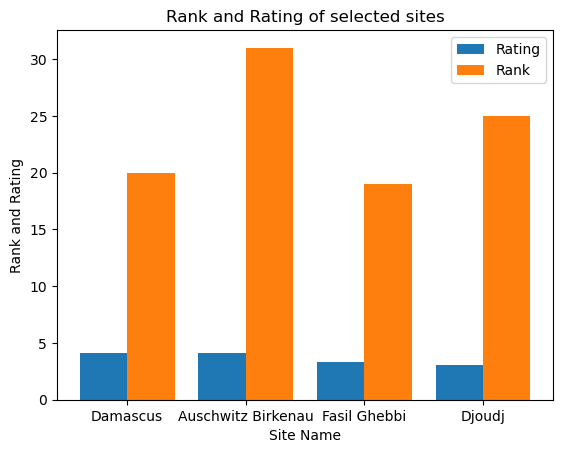

In [93]:
import matplotlib.pyplot as plt
X = ['Damascus','Auschwitz Birkenau','Fasil Ghebbi','Djoudj'] 
Yrating = [4.15,4.10,3.31,3.08] 
Zrank = [20,31,19,25] 

X_axis = np.arange(len(X)) 

plt.bar(X_axis - 0.2, Yrating, 0.4, label = 'Rating') 
plt.bar(X_axis + 0.2, Zrank, 0.4, label = 'Rank') 

plt.xticks(X_axis, X) 
plt.xlabel("Site Name") 
plt.ylabel("Rank and Rating") 
plt.title("Rank and Rating of selected sites") 
plt.legend() 
plt.show() 


***

# <center>Conclusion</center>

<p>I believe I have already covered the results relating to the popularity of UNESCO World Heritage sites during 2024 and beyond. I initially was under the impression that the Rank directly related to the ranking. However, having taken a closer look at the data source noted below, I believe that rank may purely refer to the id number allocated to each individual site. There were other lists included on the website such as 'Best Rated' that show a completely different set of data. The number of visitors impacts the validity of how popular heritage sites are-as less visitors means less reviews/statistics collected. Any decreases in popularity of sites may be due to numerous issues. Covid-19 could have lowered the rating as it would have lowered the visitation numbers, the criteria for Unesco heritage sites may have changed, destruction or damage of sites may have removed sites from the list or again prevented tourists from visiting certain sites. For more information on this dataset please <a href="https://www.kaggle.com/datasets/rishabhbhartiya/unesco-world-heritage-updated-2024">view this link.</a> The data included within this dataset was retrieved from <a href="https://www.worldheritagesite.org/ranking/most+visited+sites"> world heritage.</a></p>